#1.0 Defining the Analytic Question





## (i)Specifying the data analytic question
> Six datasets has been provided containing customers,orders and deliveries from Kenya and Nigeria.

## (ii)Metric of Success
>Build an good classification and prediction model that will


1.   Predict customer retention
2.   Classify customers




## (iii)Experimental Design Taken


1.   Importing Libraries
2.   Data Merging
3.   Data Cleaning
4.   Performing Exploratory Data analysis
5.   Normality Tests
6.   Modelling
7.   Recommedations
8.   Conclusions



#2.0 Importing the libraries

In [9]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from functools import reduce

##2.1 Reading the data

In [10]:
#Uploading the datasets to our working directory
#Kenya Customers]
KCus=pd.read_csv('/content/Kenya Customers.csv')

#Previewing the top rows of the Kenya customers dataset
KCus.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
0,3144837,WEB,0,2021-03-15T17:13:19.000Z,en,0,0,NaN,NaN
1,3174590,WEB,0,2021-03-20T14:15:11.000Z,en,0,0,NaN,NaN
2,3181998,WEB,0,2021-03-21T15:36:51.000Z,en,0,0,NaN,NaN
3,3191244,WEB,0,2021-03-23T08:54:00.000Z,en,0,367,NaN,NaN
4,3274222,WEB,0,2021-04-06T13:52:39.000Z,en,0,0,NaN,NaN


In [11]:
#Kenya Deliveries
KDel=pd.read_csv('/content/Kenya Deliveries.csv')

#Previewing the top rows of the Kenya customers dataset
KDel.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,12,KSh 300.00,-,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN
2,368109621,"YR-11265175,0",3.681096e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:46:43 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.25,36.883330,NaN,-,Order_Details,10,KSh 19900.00,-,KSh 0.00,KSh 0.00,KSh 400.00,19500,CASH,-,-,-,NaN,NaN
3,368105817,"YR-11265015,0",3.681058e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:37:16 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4400.00,-,KSh 0.00,KSh 0.00,KSh 50.00,4350,CASH,-,-,-,NaN,NaN
4,368098308,"YR-11264651,0",3.680983e+29,Default Team,Delivery,Urgently deliver by 9.30am in the morning,-,-,-,-,Topup Mama,17 Feb 2022 04:19:53 pm,18 Feb 2022 09:00:00 am,-,Unassigned,-,0,-,-1.282722,36.743347,NaN,-,Order_Details,1,KSh 180.00,-,-,-,-,-,-,-,-,-,NaN,NaN


In [12]:
#Kenya Orders
KOrd=pd.read_csv('/content/Kenya Orders.csv')

#Previewing the top rows of the Kenya customers dataset
KOrd.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,4400,4350.0,4400,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,50,-,NaN,0,-,-
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,NaN,NaN,1,180,130,130,180,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
2,11264651,ORDERED,Flour & Sugar,KKFS0702,NaN,NaN,6,263,247,1482,1578,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,NaN,NaN,10,65,58,580,650,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
4,11264651,ORDERED,Beverages,KKBE0105,NaN,NaN,1,249,208.5,208.5,249,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-


In [13]:
#Nigeria Customers
NCus=pd.read_csv('/content/Nigeria Customers.csv')

#Previewing the top rows of the Kenya customers dataset
NCus.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees
0,3922702,WEB,0,2021-07-12T08:06:47.000Z,en,0,0,NaN
1,4058001,WEB,0,2021-08-05T08:22:35.000Z,en,0,0,NaN
2,4058334,WEB,0,2021-08-05T09:38:09.000Z,en,0,0,NaN
3,4058414,WEB,0,2021-08-05T09:56:57.000Z,en,0,0,NaN
4,4058431,WEB,0,2021-08-05T09:59:51.000Z,en,0,0,NaN


In [14]:
#Nigeria Deliveries
NDel=pd.read_csv('/content/Nigeria Deliveries.csv')

#Previewing the top rows of the Kenya customers dataset
NDel.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
2,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.555800,3.392317,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
3,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.555800,3.392317,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
4,367999205,"YR-11261341,0",3.679992e+29,Default Team,Delivery,NaN,1233220,-,-,Topup Mama,17 Feb 2022 10:33:11 am,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.481961,3.347986,NaN,-,Order_Details,6,₦ 1950.00,-,-,-,-,-,-,-,-,-


In [15]:
#Nigeria Deliveries
NOrd=pd.read_csv('/content/Nigeria Orders.csv')

#Previewing the top rows of the Kenya customers dataset
NOrd.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11262518,ORDERED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,104250,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4645484,1048159,Topup Mama,-,NaN,11996.01,2022-02-17T12:03:13.000Z,2022-02-17T12:04:02.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
1,11262518,ORDERED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,325,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4645484,1048159,Topup Mama,-,NaN,11996.01,2022-02-17T12:03:13.000Z,2022-02-17T12:04:02.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
2,11261796,DISPATCHED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,104250,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4420776,1048159,Topup Mama,-,NaN,11994.38,2022-02-17T11:09:43.000Z,2022-02-17T11:10:30.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
3,11261796,DISPATCHED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,325,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4420776,1048159,Topup Mama,-,NaN,11994.38,2022-02-17T11:09:43.000Z,2022-02-17T11:10:30.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
4,11261341,ORDERED,Spreads,KNSP2001,NaN,NaN,6,325,300,1800,1950,87550.0,87550,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,5156201,1048159,Topup Mama,-,NaN,11998.28,2022-02-17T10:32:23.000Z,2022-02-17T10:33:11.000Z,2022-02-17T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-


#3.0 Data Merging

In [16]:
#We will now merge the six datasets using the concat function
#First we list the dataframes we want to merge

data_frames=[KOrd, KCus, KDel,NCus,NOrd,NDel]



In [17]:
#Merging
#
df4 = pd.concat(data_frames)

In [18]:
#Merged dataframe shape
df4.shape

(71945, 90)

In [19]:
df4.to_csv('df4')

##3.1 Checking the data

In [20]:
# Determining the number of records in our dataset
#
print(f"Our dataset has {df4.shape} rows and columns")

Our dataset has (71945, 90) rows and columns


In [21]:
# Previewing the last 10 rows of our dataset
#
df4.tail(n=10)

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,...,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Delivery_Charges,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35,Number of Employees
8009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,299302141.0,"YR-7744549,0",2.993021e+29,Default Team,Delivery,NaN,-,NaN,-,0,Kibanda Topup Nigeria,05 Aug 2021 03:30:00 pm,06 Aug 2021 10:30:00 am,05 Aug 2021 03:42:38 pm,Cancelled,-,0,-,-1.107935,37.015014,NaN,-,Order_Details,1,₦ 17000.00,-,-,-,-,-,-,-,NaN,NaN,NaN
8010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,₦ 0.00,₦ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,299302141.0,"YR-7744549,0",2.993021e+29,Default Team,Delivery,NaN,-,NaN,-,0,Kibanda Topup Nigeria,05 Aug 2021 03:30:00 pm,06 Aug 2021 10:30:00 am,05 Aug 2021 03:42:38 pm,Cancelled,-,0,-,-1.107935,37.015014,NaN,-,Order_Details,5,₦ 10000.00,-,₦ 0.00,27000,CASH,-,-,-,NaN,NaN,NaN
8011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,299286068.0,"YR-7742547,0",2.992861e+29,Default Team,Delivery,NaN,-,NaN,-,0,Kibanda Topup Nigeria,05 Aug 2021 01:49:23 pm,05 Aug 2021 02:30:00 pm,07 Aug 2021 01:08:49 pm,Completed,-,0,-,6.531579,3.382179,NaN,-,Order_Details,5,₦ 26000.00,-,-,-,-,-,-,-,NaN,NaN,NaN
8012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,₦ 0.00,₦ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,299286068.0,"YR-7742547,0",2.992861e+29,Default Team,Delivery,NaN,-,NaN,-,0,Kibanda Topup Nigeria,05 Aug 2021 01:49:23 pm,05 Aug 2021 02:30:00 pm,07 Aug 2021 01:08:49 pm,Completed,-,0,-,6.531579,3.382179,NaN,-,Order_Details,5,₦ 26500.00,-,₦ 0.00,52500,CASH,-,-,-,NaN,NaN,NaN
8013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,₦ 0.00,₦ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,299265028.0,"YR-7740358,0",2.992650e+29,Default Team,Delivery,NaN,-,NaN,-,0,Kibanda Topup Nigeria,05 Aug 2021 11:34:01 am,05 Aug 2021 03:30:00 pm,05 Aug 2021 11:34:32 am,Cancelled,-,0,-,28.613939,77.209021,NaN,-,Order_Details,1,₦ 17000.00,-,₦ 0.00,17000,CASH,-,-,-,NaN,NaN,NaN
8014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,₦ 0.00,₦ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,299262559.0,"YR-7740083,0",2.992626e+29,Default Team,Delivery,NaN,-,NaN,-,0,Kibanda Topup Nigeria,05 Aug 2021 11:13:26 am,05 Aug 2021 01:30:00 pm,05 Aug 2021 11:34:24 am,Cancelled,-,0,-,6.548535,3.327299,NaN,-,Order_Details,5,₦ 10000.00,-,₦ 0.00,10000,CASH,-,-,-,NaN,NaN,NaN
8015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,₦ 0.00,₦ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [22]:
# Checking whether each column has an appropriate datatype
#
df4.dtypes

Order ID               float64
Order Status            object
Category Name           object
SKU                     object
Customization Group    float64
                        ...   
Earning                 object
Pricing                 object
Unnamed: 34             object
Unnamed: 35             object
Number of Employees    float64
Length: 90, dtype: object

#4.0 Data Cleaning

##4.1 Missing Data

In [23]:
# percentage of missing values in each column

a=df4.isnull().sum()/len(df4)*100
a

Order ID                80.997985
Order Status            80.997985
Category Name           81.006324
SKU                     81.002154
Customization Group    100.000000
                          ...    
Earning                 26.329835
Pricing                 26.329835
Unnamed: 34             99.848495
Unnamed: 35             99.945792
Number of Employees     99.159080
Length: 90, dtype: float64

####(i)Dealing with missing data 

In [24]:
#dropping columns that contain missing observations
finaldf=df4.dropna(how='all',axis=1)

In [25]:
finaldf.isnull().sum()/len(df4)*100
finaldf.shape

(71945, 82)

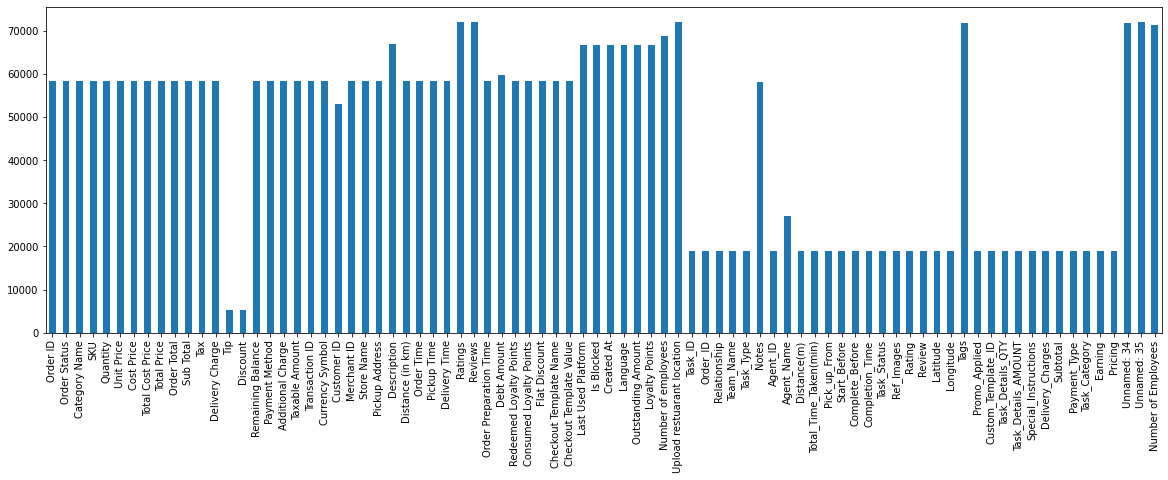

In [26]:
#Visualiing our null values
# visualizing our null values
finaldf.isna().sum().plot(kind="bar",figsize=(20,6))
plt.show()

>This indicates that our data has too many missing values. Dropping them or imputing the missing values might result to biased or manipulated results.

In [27]:
finaldf.fillna(0)

,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Checkout Template Name,Checkout Template Value,Last Used Platform,...,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Delivery_Charges,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35,Number of Employees
0,11265015.0,ORDERED,Cooking Fat & Oil,KKCO0487,1.0,4400.0,4250,4250,4400.0,4350.0,4400.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,3755460.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",0,10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,0.0,0,0.0,-,50,-,0.0,-,-,0,...,0,0.0,0.0,0.0,0,0.0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,11264651.0,ORDERED,Cleaning & Hygiene,KKPT280100,1.0,180.0,130,130,180.0,7255.0,7255.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,4541187.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0.0,0,0.0,-,-,-,0.0,-,-,0,...,0,0.0,0.0,0.0,0,0.0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,11264651.0,ORDERED,Flour & Sugar,KKFS0702,6.0,263.0,247,1482,1578.0,7255.0,7255.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,4541187.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0.0,0,0.0,-,-,-,0.0,-,-,0,...,0,0.0,0.0,0.0,0,0.0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,11264651.0,ORDERED,Salt & Seasoning,KKSS0002,10.0,65.0,58,580,650.0,7255.0,7255.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,4541187.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0.0,0,0.0,-,-,-,0.0,-,-,0,...,0,0.0,0.0,0.0,0,0.0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,11264651.0,ORDERED,Beverages,KKBE0105,1.0,249.0,208.5,208.5,249.0,7255.0,7255.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,4541187.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0.0,0,0.0,-,-,-,0.0,-,-,0,...,0,0.0,0.0,0.0,0,0.0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,0.0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,₦ 0.00,₦ 0.00,0.0,0,0,0,0.0,0,0.0,0.0,0,0,0,0.00,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,...,0,0.0,0.0,0.0,0,299262559.0,"YR-7740083,0",2.992626e+29,Default Team,Delivery,0,-,0,-,0,Kibanda Topup Nigeria,05 Aug 2021 11:13:26 am,05 Aug 2021 01:30:00 pm,05 Aug 2021 11:34:24 am,Cancelled,-,0,-,6.548535,3.327299,0,-,Order_Details,5,₦ 10000.00,-,₦ 0.00,10000,CASH,-,-,-,0,0,0.0
8015,0.0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,₦ 0.00,₦ 0.00,0.0,0,0,0,

##4.2 Duplicates

In [28]:
# Checking for duplicated columns
#
finaldf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8014    False
8015    False
8016    False
8017    False
8018    False
Length: 71945, dtype: bool

> We have no duplicated columns

##4.3 Uniformity

In [29]:
# checking our columns for uniformity
finaldf.columns

Index(['Order ID', 'Order Status', 'Category Name', 'SKU', 'Quantity',
       'Unit Price', 'Cost Price', 'Total Cost Price', 'Total Price',
       'Order Total', 'Sub Total', 'Tax', 'Delivery Charge', 'Tip', 'Discount',
       'Remaining Balance', 'Payment Method', 'Additional Charge',
       'Taxable Amount', 'Transaction ID', 'Currency Symbol', 'Customer ID',
       'Merchant ID', 'Store Name', 'Pickup Address', 'Description',
       'Distance (in km)', 'Order Time', 'Pickup Time', 'Delivery Time',
       'Ratings', 'Reviews', 'Order Preparation Time', 'Debt Amount',
       'Redeemed Loyalty Points', 'Consumed Loyalty Points', 'Flat Discount',
       'Checkout Template Name', 'Checkout Template Value',
       'Last Used Platform', 'Is Blocked', 'Created At', 'Language',
       'Outstanding Amount', 'Loyalty Points', 'Number of employees',
       'Upload restuarant location', 'Task_ID', 'Order_ID', 'Relationship',
       'Team_Name', 'Task_Type', 'Notes', 'Agent_ID', 'Agent_Name',
  

###4.3(i)Removing white spaces

In [30]:
#Pre-processing 1
#Removing  white spaces
finaldf.columns=finaldf.columns.str.strip().str.replace(' ','_')
finaldf.columns

Index(['Order_ID', 'Order_Status', 'Category_Name', 'SKU', 'Quantity',
       'Unit_Price', 'Cost_Price', 'Total_Cost_Price', 'Total_Price',
       'Order_Total', 'Sub_Total', 'Tax', 'Delivery_Charge', 'Tip', 'Discount',
       'Remaining_Balance', 'Payment_Method', 'Additional_Charge',
       'Taxable_Amount', 'Transaction_ID', 'Currency_Symbol', 'Customer_ID',
       'Merchant_ID', 'Store_Name', 'Pickup_Address', 'Description',
       'Distance_(in_km)', 'Order_Time', 'Pickup_Time', 'Delivery_Time',
       'Ratings', 'Reviews', 'Order_Preparation_Time', 'Debt_Amount',
       'Redeemed_Loyalty_Points', 'Consumed_Loyalty_Points', 'Flat_Discount',
       'Checkout_Template_Name', 'Checkout_Template_Value',
       'Last_Used_Platform', 'Is_Blocked', 'Created_At', 'Language',
       'Outstanding_Amount', 'Loyalty_Points', 'Number_of_employees',
       'Upload_restuarant_location', 'Task_ID', 'Order_ID', 'Relationship',
       'Team_Name', 'Task_Type', 'Notes', 'Agent_ID', 'Agent_Name',
  

###(ii)Converting the column names to lower case

In [31]:
#Pre-processing 2
#Converting the columns names to lowercase
finaldf.columns=map(str.lower,finaldf.columns)
finaldf.columns

Index(['order_id', 'order_status', 'category_name', 'sku', 'quantity',
       'unit_price', 'cost_price', 'total_cost_price', 'total_price',
       'order_total', 'sub_total', 'tax', 'delivery_charge', 'tip', 'discount',
       'remaining_balance', 'payment_method', 'additional_charge',
       'taxable_amount', 'transaction_id', 'currency_symbol', 'customer_id',
       'merchant_id', 'store_name', 'pickup_address', 'description',
       'distance_(in_km)', 'order_time', 'pickup_time', 'delivery_time',
       'ratings', 'reviews', 'order_preparation_time', 'debt_amount',
       'redeemed_loyalty_points', 'consumed_loyalty_points', 'flat_discount',
       'checkout_template_name', 'checkout_template_value',
       'last_used_platform', 'is_blocked', 'created_at', 'language',
       'outstanding_amount', 'loyalty_points', 'number_of_employees',
       'upload_restuarant_location', 'task_id', 'order_id', 'relationship',
       'team_name', 'task_type', 'notes', 'agent_id', 'agent_name',
  

4.4 Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


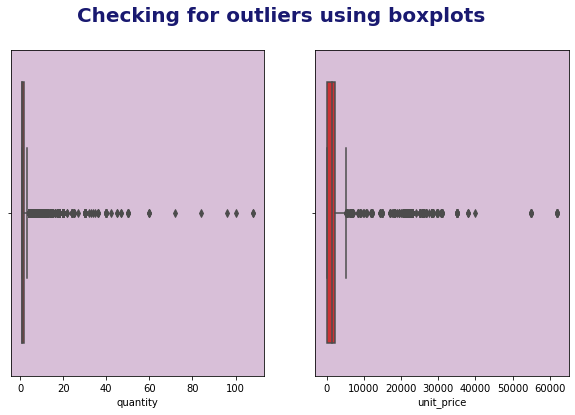

In [32]:
# Checking for Outliers in the numerical columns
#
numerical_cols = finaldf[['quantity','unit_price','cost_price','subtotal','total_price']]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='midnightblue')
for ax, data, column in zip(axes.flatten(),finaldf,numerical_cols):
  sns.boxplot(finaldf[column],ax=ax,palette='Set1')
  ax.set_facecolor('thistle')

##Exporting the clean dataset

In [33]:
#Exporting the Clean Dataset
finaldf.to_csv('Df.csv')

#5.0 Exploratory Data Analysis

##5.1 Univariate Analysis

### (i) Bar Charts

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,7,8,12,13,17,18,19,21,24,25,26,28,29,30,32,34,35,36,38,39,40,42,43,47,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


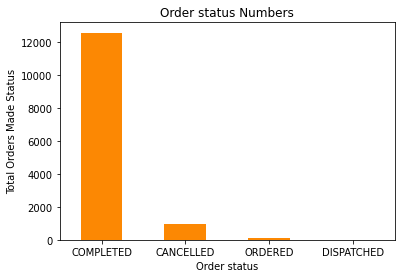

In [34]:
#Creating a bar chart for our categorical columns
#
Df=pd.read_csv('/content/Df.csv')
Df.order_status.value_counts().plot.bar(rot=0,color='#fc8803')

plt.xlabel('Order status')
plt.ylabel('Total Orders Made Status')
plt.title('Order status Numbers')
plt.show()


>The bar graph shows that most orders have been completed while a few were cancelled. Very few orders had been made too.

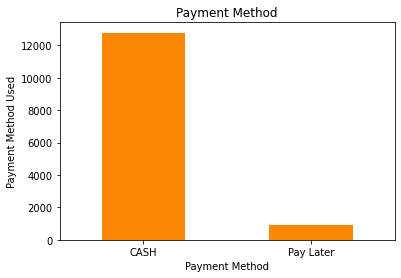

In [35]:
#Bar chart representing the payment mathod type
Df.payment_method.value_counts().plot.bar(rot=0,color='#fc8803')

plt.xlabel('Payment Method')
plt.ylabel('Payment Method Used')
plt.title('Payment Method')
plt.show()

> This shows that the most preffered method of payment is cash.

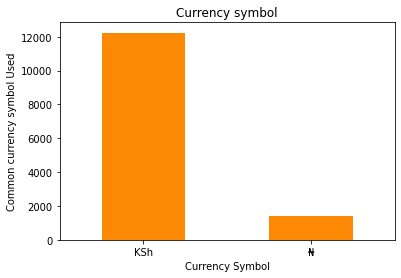

In [36]:
#Bar chart representing the currency method used
Df.currency_symbol.value_counts().plot.bar(rot=0,color='#fc8803')

plt.xlabel('Currency Symbol')
plt.ylabel('Common currency symbol Used')
plt.title('Currency symbol')
plt.show()

>most used currency symbol used is kenyan shilling.

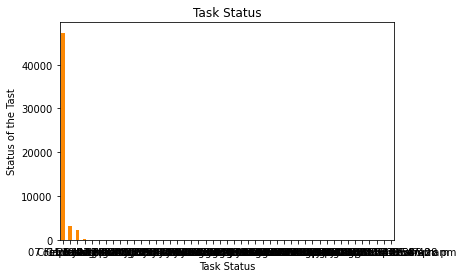

In [37]:
#Bar chart representing the payment type left
Df.task_status.value_counts().plot.bar(rot=0,color='#fc8803')

plt.xlabel('Task Status')
plt.ylabel('Status of the Tast')
plt.title('Task Status')
plt.show()

> The bar graph shows that most tasks were completed and a comparetively few failed or were cancelled. 

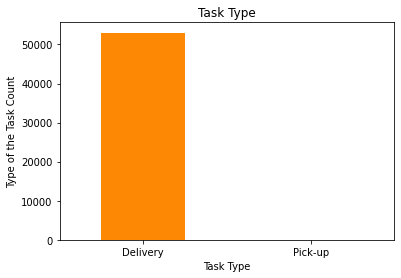

In [38]:
#Bar chart representing the task type
Df.task_type.value_counts().plot.bar(rot=0,color='#fc8803')

plt.xlabel('Task Type')
plt.ylabel('Type of the Task Count')
plt.title('Task Type')
plt.show()

>The bar graph above shows that all the tasks were delivery type,none were to be picked up by customers.

###(ii)Frequency Tables

In [39]:
#Frequency Table for task type
Df['task_type'].value_counts().to_frame()

,task_type
Delivery,52999
Pick-up,3


>52999 of the tasks were to be delivered while on 3 tasks   were pick-up

In [40]:
#Frequency Table for category name
Df['category_name'].value_counts().to_frame()

,category_name
Flour & Sugar,4539
Cooking Fat & Oil,3091
Salt & Seasoning,1985
Cleaning & Hygiene,956
Fruits & Vegetables,922
Packaging,731
Rice & Cereals,485
Meat & Fish,461
Beverages,304
Spreads,70


>This shows that flour and sugar is the most ordered item while wine is the least.

In [41]:
Df

,Unnamed: 0,order_id,order_status,category_name,sku,quantity,unit_price,cost_price,total_cost_price,total_price,order_total,sub_total,tax,delivery_charge,tip,discount,remaining_balance,payment_method,additional_charge,taxable_amount,transaction_id,currency_symbol,customer_id,merchant_id,store_name,pickup_address,description,distance_(in_km),order_time,pickup_time,delivery_time,ratings,reviews,order_preparation_time,debt_amount,redeemed_loyalty_points,consumed_loyalty_points,flat_discount,checkout_template_name,checkout_template_value,...,language,outstanding_amount,loyalty_points,number_of_employees,upload_restuarant_location,task_id,order_id.1,relationship,team_name,task_type,notes,agent_id,agent_name,distance(m),total_time_taken(min),pick_up_from,start_before,complete_before,completion_time,task_status,ref_images,rating,review,latitude,longitude,tags,promo_applied,custom_template_id,task_details_qty,task_details_amount,special_instructions,delivery_charges,subtotal,payment_type,task_category,earning,pricing,unnamed:_34,unnamed:_35,number_of_employees.1
0,0,11265015.0,ORDERED,Cooking Fat & Oil,KKCO0487,1.0,4400.0,4250,4250,4400.0,4350.0,4400.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,3755460.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,NaN,NaN,0.0,-,50,-,0.0,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11264651.0,ORDERED,Cleaning & Hygiene,KKPT280100,1.0,180.0,130,130,180.0,7255.0,7255.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,4541187.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,0.0,-,-,-,0.0,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,11264651.0,ORDERED,Flour & Sugar,KKFS0702,6.0,263.0,247,1482,1578.0,7255.0,7255.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,4541187.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,0.0,-,-,-,0.0,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,11264651.0,ORDERED,Salt & Seasoning,KKSS0002,10.0,65.0,58,580,650.0,7255.0,7255.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,4541187.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,0.0,-,-,-,0.0,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,11264651.0,ORDERED,Beverages,KKBE0105,1.0,249.0,208.5,208.5,249.0,7255.0,7255.0,-,-,-,-,0.0,CASH,-,-,0.0,KSh,4541187.0,893555.0,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,0.0,-,-,-,0.0,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71940,8014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,₦ 0.00,₦ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,299262559.0

>The frequency table above shows that 7241 of the tasks were completed,350 failed ,338 were cancelled and so on.

In [42]:
Df.columns

Index(['Unnamed: 0', 'order_id', 'order_status', 'category_name', 'sku',
       'quantity', 'unit_price', 'cost_price', 'total_cost_price',
       'total_price', 'order_total', 'sub_total', 'tax', 'delivery_charge',
       'tip', 'discount', 'remaining_balance', 'payment_method',
       'additional_charge', 'taxable_amount', 'transaction_id',
       'currency_symbol', 'customer_id', 'merchant_id', 'store_name',
       'pickup_address', 'description', 'distance_(in_km)', 'order_time',
       'pickup_time', 'delivery_time', 'ratings', 'reviews',
       'order_preparation_time', 'debt_amount', 'redeemed_loyalty_points',
       'consumed_loyalty_points', 'flat_discount', 'checkout_template_name',
       'checkout_template_value', 'last_used_platform', 'is_blocked',
       'created_at', 'language', 'outstanding_amount', 'loyalty_points',
       'number_of_employees', 'upload_restuarant_location', 'task_id',
       'order_id.1', 'relationship', 'team_name', 'task_type', 'notes',
       'agen

In [43]:
#Frequency Table for order status 
Df['order_status'].value_counts().to_frame()

,order_status
COMPLETED,12554
CANCELLED,978
ORDERED,134
DISPATCHED,5


>This means that 12554ofthe orders were completed,978 were cancelled and 134 had been ordered.

In [44]:
#Frequency Table for currency symbol
Df['currency_symbol'].value_counts().to_frame()

,currency_symbol
KSh,12242
₦,1429


>This shows that 12242 orders were paid in kshs and 1429 in Naira.

In [45]:
#Frequency Table for payment method left
Df['payment_method'].value_counts().to_frame()

,payment_method
CASH,12782
Pay Later,889


>This shows that 12782 of the orders were paid by cash and the rest 889 by Pay Later method.

In [46]:
#Frequency Table for store name 
Df['store_name'].value_counts().to_frame()

,store_name
Topup Mama,13671


>All of the orders were delivered and picked up from the topup mama stores.

###(iii) PieCharts

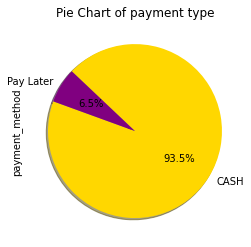

In [47]:
#pie chart representation of the payment method distribution
colors = ['gold', 'purple']
Df['payment_method'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of payment type')
plt.show()

>93.5% of the payments were made by cash while 6.5% by Pay Later method.

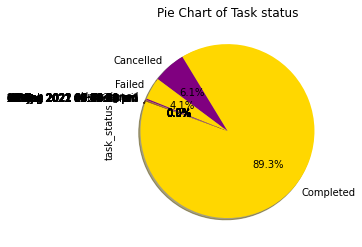

In [48]:
#pie chart representation of the task status distribution
colors = ['gold', 'purple']
Df['task_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of Task status')
plt.show()

>89.3 % of the tasks were completed while the rest either failed,was cancelled,unassigned or was declined.

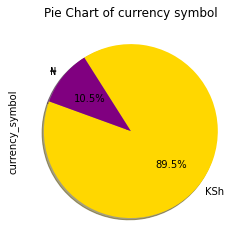

In [49]:
#pie chart representation of the currency symbol distribution
colors = ['gold', 'purple']
Df['currency_symbol'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of currency symbol')
plt.show()

>89.5% of the currency used is KSH while 10.5% is Nigerian Naira.

###(iv)Descriptive Statistics

In [50]:
#The descriptive statistics will give us the measures of central tendency  and dispersion of our data
#
Df.describe()

,Unnamed: 0,order_id,quantity,unit_price,total_price,order_total,sub_total,remaining_balance,transaction_id,customer_id,merchant_id,distance_(in_km),ratings,order_preparation_time,flat_discount,is_blocked,outstanding_amount,loyalty_points,number_of_employees,task_id,relationship,longitude,number_of_employees.1
count,71945.000000,1.367100e+04,13671.000000,13671.000000,1.367100e+04,1.367100e+04,1.367100e+04,13671.0,13671.0,1.894300e+04,1.367100e+04,13671.000000,32.0,13671.0,13671.0,5272.000000,5272.0,5272.000000,3.139000e+03,5.300200e+04,5.300200e+04,53002.000000,6.050000e+02
mean,15694.333616,1.086173e+07,2.660742,3018.519640,1.018708e+04,2.176395e+04,2.190261e+04,0.0,0.0,4.276536e+06,9.097154e+05,1269.862398,5.0,0.0,0.0,0.018399,0.0,110.023141,5.504071e+06,3.273199e+08,3.273199e+29,31.700802,9.368496e+08
std,13661.650516,2.404940e+05,4.341853,6091.088315,4.811819e+04,5.852532e+04,5.884280e+04,0.0,0.0,3.661067e+05,4.730190e+04,3670.350298,0.0,0.0,0.0,0.134402,0.0,597.896925,1.346578e+08,2.541199e+07,2.541199e+28,12.154744,2.598402e+09
min,0.000000,1.038727e+07,1.000000,20.000000,2.500000e+01,1.080000e+03,2.000000e+03,0.0,0.0,3.144837e+06,8.935550e+05,0.980000,5.0,0.0,0.0,0.000000,0.0,0.000000,-2.000000e+00,2.186499e+08,2.186499e+29,-122.401468,1.000000e+00
25%,3865.000000,1.067458e+07,1.000000,120.000000,2.200000e+02,4.390080e+03,4.435000e+03,0.0,0.0,4.026966e+06,8.935550e+05,5.030000,5.0,0.0,0.0,0.000000,0.0,0.000000,2.000000e+00,3.062582e+08,3.062582e+29,36.782792,2.000000e+00
50%,10626.000000,1.086190e+07,1.000000,1390.000000,1.670000e+03,7.658000e+03,7.721000e+03,0.0,0.0,4.221486e+06,8.935550e+05,8.930000,5.0,0.0,0.0,0.000000,0.0,3.000000,2.000000e+00,3.253174e+08,3.253174e+29,36.828960,3.000000e+00
75%,26996.000000,1.107246e+07,2.000000,2180.000000,4.275000e+03,1.668500e+04,1.690000e+04,0.0,0.0,4.573044e+06,8.935550e+05,15.160000,5.0,0.0,0.0,0.000000,0.0,43.000000,3.000000e+00,3.517854e+08,3.517854e+29,36.897591,5.000000e+00
max,44982.000000,1.126502e+07,108.000000,62000.000000,1.257000e+06,1.252000e+06,1.257000e+06,0.0,0.0,5.189011e+06,1.048159e+06,12012.180000,5.0,0.0,0.0,1.000000,0.0,23307.000000,7.034704e+09,3.681104e+08,3.681104e+29,77.209021,9.159746e+09


##5.2 Bivariate Analysis

###(i)Heat Map

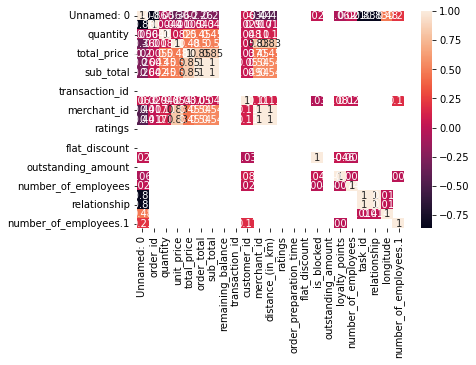

In [51]:
#Plotting a heat map
sns.heatmap(Df.corr(),annot=True)
plt.show()

###(iii)Bar Charts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Order status and payment method')

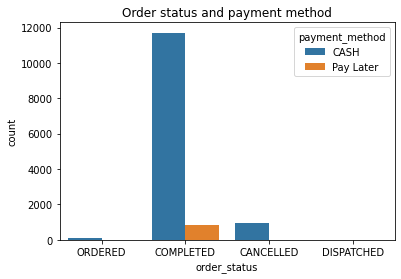

In [52]:
#A bar chart represnting the order status and the task status of the order made
sns.countplot('order_status', hue='payment_method', data=Df)
plt.title('Order status and payment method')

>Most of the completed orders were paid  by cash and few by Pay Later method.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Order status and currency symbol')

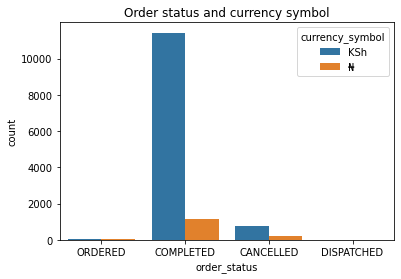

In [53]:
#A bar chart represnting the payment type and the order status of the order made
sns.countplot('order_status', hue='currency_symbol', data=Df)
plt.title('Order status and currency symbol')

> This indicates that of all the completed,cancelled and ordered tasks,the most common currency symbol is KSH.

#6.0 Model Implementation

##Kmeans Clustering

In [54]:
# import libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [55]:
df6=Df.replace(to_replace = '-', value = 0)

In [56]:
df7=df6.replace(to_replace = np.nan, value = 0)

In [57]:
df7.delivery_charge.unique()

array([0.])

###Encoding

In [58]:
#Using Label Encoder to convert the categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

label_encoder.fit(Df['currency_symbol'])
Df['currency_symbol']=label_encoder.transform(Df['currency_symbol'])

In [59]:

#Feature Selection
X= df7[['order_total', 'total_cost_price','delivery_charge','sub_total','taxable_amount']]

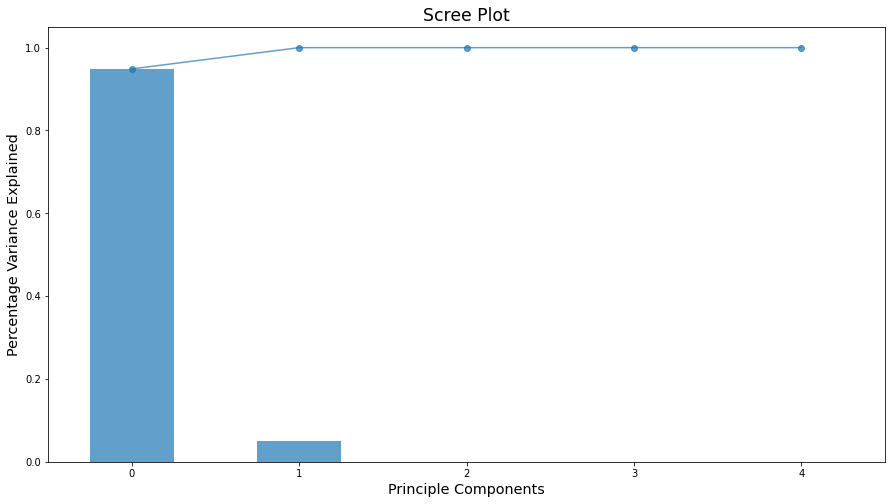

In [60]:
pca = PCA()
pca.fit(X)
sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

>This indicates that of all the selected features,only 2 have high variance.

In [61]:
# creating PCA with 2 components
pca = PCA(n_components=2)
X = pca.fit_transform(X)

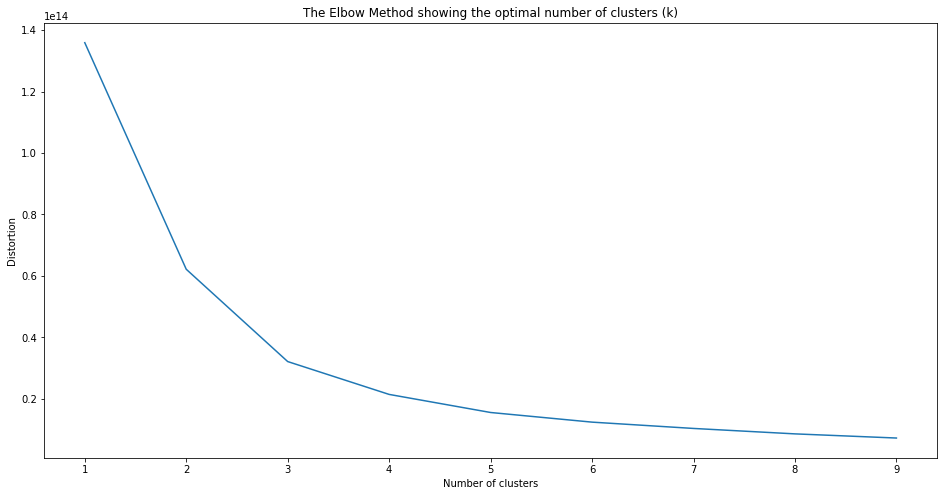

In [62]:
# Create Elbow Plot to find the optimal k value

w = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

>3 is the optimal value of clusters

In [63]:
# create a pipeline to scale data and 
# Apply KMeans 
kmean = KMeans(n_clusters=3)

kmean.fit(X)
y_pred = kmean.predict(X)


#Conclusions

1.   Most used currency used is KSH.
2.  Most ordered items are flour and sugar and least ordered is wine
3.   The most preffered payment method is cash compared to Pay Later.
4.  Most of the ordered items are delivered and few are pickup deliveries.
5.  Most orders have been completed and few dispatched. 








